# Visor de resultados

### Importaciones y funciones

In [96]:
import numpy as np
import os
import PIL
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib import image
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

### Funciones 

In [97]:
def metricasCM(matriz):
    # Bien clasificados sobre columna / De todas las X clasificadas solo el %  fue correcto
    metrica1= []
    # Bien clasificados sobre la fila / De todas las que deberías ser clasificadas como X solo el % fue corrcto 
    metrica2= []
    for j in range(0,5):
        suma=0
        for i in range(0,5):
            suma=suma+matriz[i][j]
        metrica1.append((matriz[j][j]/suma).round(2))
        metrica2.append((matriz[j][j]/sum(matriz[j])).round(2))
    print("De todas las X clasificadas solo el %  fue correcto",metrica1)
    print("De todas las que deberían ser clasificadas como X el % fue corrcto ",metrica2)

In [6]:
def graph_prop(path,name,modelo):
    class_names =['bathroom', 'bedroom','dining room', 'kitchen', 'living room']
    num_imagenes = 14
    model = modelo
    fig, axes = plt.subplots(1,num_imagenes+1, figsize=(22,2))
    axes[0].text(0, 0.5,name, fontsize=8)
    axes[0].axis("off")
    os.chdir(path)
    folders = os.listdir()
    j=1
    for f in folders:
        path_in = path+"/"+f
        os.chdir(path_in)
        files= os.listdir()
        for i in files:
            path_image=path_in+"/"+i
            im = image.imread(path_image)
            axes[j].imshow(im)
            img = keras.preprocessing.image.load_img(path_image, target_size=(512, 512))
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)
            axes[j].set_title(class_names[np.argmax(model.predict(img_array), axis=-1)[0]],fontsize = 8)
            axes[j].axis("off")       
            j = j+1 
    if j < num_imagenes+1:
        for k in range(j,num_imagenes+1):
            fig.delaxes(axes[k])

In [7]:
def test_props(modelo, data):
    root = data
    model = modelo
    #Setting de parametos
    img_height=512
    img_width=512
    
    props = []
    loss = []
    accuracy = []
    instances=[]
    statistics = {}
    os.chdir(root)
    properties = os.listdir()

    for p in properties:
        props.append(p)
        path_p = root+p
        #Crar dataset
        val_ds = tf.keras.preprocessing.image_dataset_from_directory(path_p, image_size=(img_height, img_width))
        instances.append(len(val_ds.file_paths))
        report = model.evaluate(val_ds,return_dict=True, verbose=0)
        loss.append(report['loss'])
        accuracy.append(report['accuracy'])
        statistics ["Propiedad"] = props
        statistics ["Instancias"] = instances
        statistics ["Loss"] = loss
        statistics ["Accuracy"] = accuracy
    return pd.DataFrame(statistics) 

### Carga del modelo y datos de prueba

In [210]:
root = "E:/TesisMA/Datos/DataPruebaNoAmoblado/"
modelo = 'E:/TesisMA/Modelos/512/Best_Modelo5_512_5_convdroput_x1_lr0005'
#Cargar modelo
model = tf.keras.models.load_model(modelo)

### Resumen de la arquitectura de la red

In [211]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 512, 512, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)     

### Validación de instancias especificas

In [212]:
results=test_props(model, root)
results

Found 13 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 12 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 9 files belonging to 5 classes.
Found 9 files belonging to 5 classes.
Found 13 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 9 files belonging to 5 classes.
Found 13 files belonging to 5 classes.
Found 7 files belonging to 5 classes.
Found 8 files belonging to 5 classes.
Found 14 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 7 files belonging to 5 classes.
Found 4 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 9 files belonging to 5 classes.


,Propiedad,Instancias,Loss,Accuracy
0,Apartamento3638,13,2.390023,0.692308
1,Apartamento3649,6,0.738913,0.833333
2,Apartamento3650,12,1.544295,0.833333
3,Apartamento3696,10,1.302457,0.700000
4,Apartamento3715,10,1.480023,0.600000
5,Apartamento3732,6,3.835532,0.500000
6,Apartamento3733,9,1.815350,0.444444
7,Apartamento3735,9,2.258251,0.444444
8,Apartamento3781,13,2.331802,0.461538
9,Apartamento3814,6,3.259385,0.500000


Instancias: 197
Median: 0.5857143104076385
Mean: 0.6066405867988413
SD: 0.16194147960590558


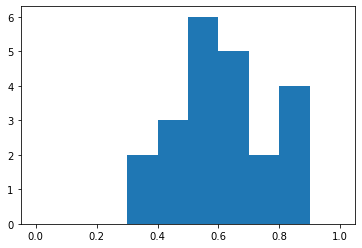

In [213]:
print("Instancias:",results["Instancias"].sum())
print("Median:",results["Accuracy"].median())
print("Mean:",results["Accuracy"].mean())
print("SD:",results["Accuracy"].std())
plt.hist(results["Accuracy"], bins=10, range=(0,1));

IndexError: list index out of range

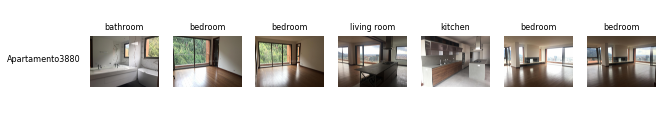

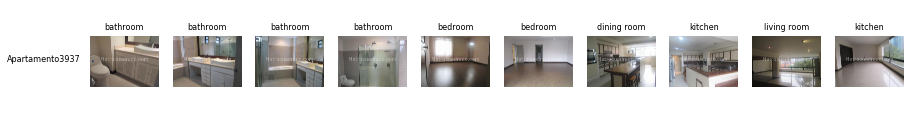

In [216]:
os.chdir(root)
properties = os.listdir()
l = np.random.randint(28, size=10)
#l = [43,40,48]  
for i in l:
    p = properties[i]
    path_p = root+p
    graph_prop(path_p,p,model)

### Matriz de confusión para el dataset de  preuba

In [177]:
def test_cm(modelo, data):
    root = data
    model = modelo
    #Setting de parametos
    img_height=512
    img_width=512
    
    preds = []
    labels=[]
    
    os.chdir(root)
    properties = os.listdir()
    
    for p in properties:
        path_p = root+p
        val_ds = tf.keras.preprocessing.image_dataset_from_directory(path_p, image_size=(img_height, img_width),shuffle=False)
        preds = preds + list(np.argmax(model.predict(val_ds), axis=-1))
        y = np.concatenate([y for x, y in val_ds], axis=0)
        labels = labels + list(y)
    return preds, labels

Found 13 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 12 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 9 files belonging to 5 classes.
Found 9 files belonging to 5 classes.
Found 13 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 9 files belonging to 5 classes.
Found 13 files belonging to 5 classes.
Found 7 files belonging to 5 classes.
Found 8 files belonging to 5 classes.
Found 14 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 10 files belonging to 5 classes.
Found 7 files belonging to 5 classes.
Found 4 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 6 files belonging to 5 classes.
Found 9 files belonging to 5 classes.
              precision    recall  f1-score   support

    bathroom       0.79      0.72      0.75        46
     bedroom       0.53      0.97      0.69   

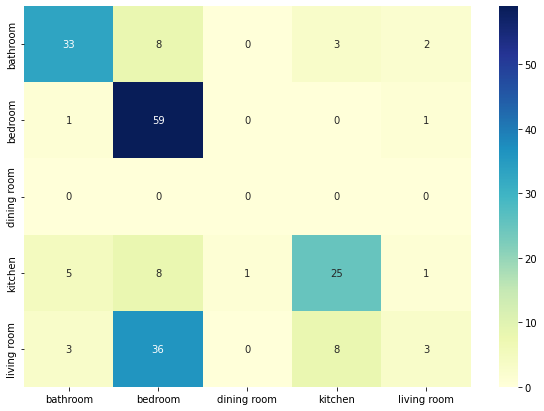

In [215]:
preds, labels = test_cm(model, root)
class_names =['bathroom', 'bedroom','dining room', 'kitchen', 'living room']
matriz = tf.math.confusion_matrix(labels=labels, predictions=preds).numpy()
df_cm = pd.DataFrame(matriz, index = class_names, columns = class_names)
#Resumen 
print(classification_report(labels, preds, target_names=class_names))
#Grácfico
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu",  fmt='g');

### Análisi de sensibilidad del Threshold 

### Matriz de confusión para el instacia especifica

In [22]:
instancia = results["Propiedad"][20]
directory = root+"/"+instancia
img_height=512
img_width=512
    
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory,image_size=(img_height, img_width))

Found 6 files belonging to 5 classes.


C:\Users\ME1C0~1.ALV\AppData\Local\Temp\2/ipykernel_7172/93462849.py:10: RuntimeWarning: invalid value encountered in long_scalars
  metrica1.append((matriz[j][j]/suma).round(2))
C:\Users\ME1C0~1.ALV\AppData\Local\Temp\2/ipykernel_7172/93462849.py:11: RuntimeWarning: invalid value encountered in long_scalars
  metrica2.append((matriz[j][j]/sum(matriz[j])).round(2))


De todas las X clasificadas solo el %  fue correcto [0.5, 0.25, nan, nan, nan]
De todas las que deberían ser clasificadas como X el % fue corrcto  [0.5, 1.0, nan, 0.0, 0.0]
None


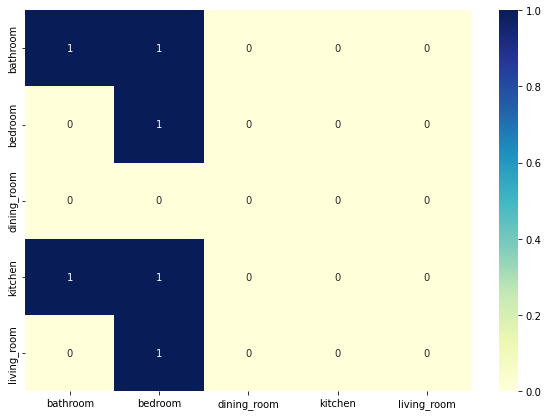

In [23]:
predictions = np.array([])
labels = np.array([])
for x, y in val_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])  
  labels= np.concatenate([labels, y])

class_names = val_ds.class_names

matriz = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
df_cm = pd.DataFrame(matriz, index = class_names, columns = class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu",  fmt='g');
print(metricasCM(matriz))
try:
    print(classification_report(labels, predictions, target_names=class_names))
except:
    pass